In [61]:
import scipy.optimize
import scipy.io as sio
import numpy as np
import control as ct
from matplotlib import pyplot as plt

%matplotlib inline

In [13]:
data = sio.loadmat("data_lab2.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'PWM', 'PWM_id', 'Temp', 'Temp_id'])

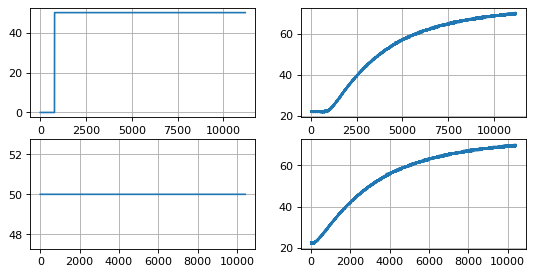

In [59]:
plt.figure(figsize=(8, 4), dpi=80)
plt.subplot(2, 2, 1)
plt.plot(data["PWM"].T[0]); plt.grid()
plt.subplot(2, 2, 2)
plt.plot(data["Temp"].T[0]); plt.grid()
plt.subplot(2, 2, 3)
plt.plot(data["PWM_id"].T[0]); plt.grid()
plt.subplot(2, 2, 4)
plt.plot(data["Temp_id"].T[0]); plt.grid()

In [125]:
# From the guide we have the requeriment: 1 pole, 0 zero
# Transfer function form => k/(s+a)
# k: gain
# a: pole
def little_model(t, k, a):
    sys = ct.TransferFunction([k], [1, a])
    u = data["PWM_id"].T[0].astype("float64")
    # return the output vector at PWM input
    return ct.forced_response(sys, U=u, T=t)[1] 

sample_rate = 62.5e-3
data_y = data["Temp_id"].T[0] - data["Temp_id"].T[0, 1]
t = np.linspace(0, len(data_y)*sample_rate, len(data_y))

params, cov = scipy.optimize.curve_fit(little_model, t, data_y)
print("params=", params)
print("covariance=", np.mean(cov))

params= [0.00409094 0.00394294]
covariance= 3.9766449550021774e-11


In [126]:
sys = ct.TransferFunction([0.00409094], [1, 0.00394294])

In [127]:
sys


  0.004091
------------
s + 0.003943

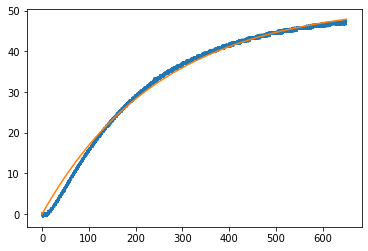

In [129]:
t = np.linspace(0, 650.9375, 10415)
u = np.ones_like(t)*50 # dutyCycle: 50%, Volts: 12V
t, y, _ = ct.forced_response(sys, U=u, T=t)
plt.plot(t, data_y)
plt.plot(t, y)

$$
G(s)=\frac{5.5}{147 s+1} e^{-15.34 s}
$$

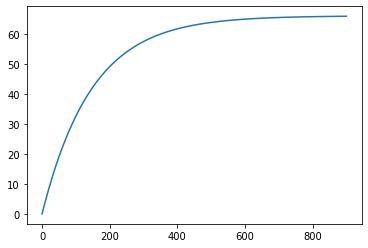

In [145]:
test_sys = ct.TransferFunction([5.5], [147, 1])
t = np.linspace(0, 900, 1000)
u = np.ones_like(t)*12 # Volts

t, y, _ = ct.forced_response(test_sys, T=t, U=u)
plt.plot(t, y)

In [144]:
y[-1]

41.488811792788674